In [ ]:
!pip install ragas deepeval datasets

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of opentelemetry-exporter-otlp-proto-grpc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.3 MB/s

In [ ]:
#fixes issues related to how colab handles async
!pip install nest_asyncio

In [ ]:
#For DeepEval Bias testcase loop
import nest_asyncio
nest_asyncio.apply()

In [ ]:
#@title Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from IPython.display import Markdown, display
from datasets import Dataset
from ast import literal_eval

from ragas.metrics import context_recall, context_precision, answer_relevancy, faithfulness
from ragas import evaluate

from deepeval import evaluate as deepeval_evaluate
from deepeval.metrics import BiasMetric
from deepeval.test_case import LLMTestCase

from google.colab import userdata

In [ ]:
#@title Env Setup

openai_api_key = userdata.get('OPENAI_KEY')
os.environ['OPENAI_API_KEY'] = openai_api_key

In [ ]:
#@title Data Loading and Preprocessing

#url = "https://raw.githubusercontent.com/ByteanAtomResearch/ai-product-course-fer/main/synthetic_mangobot_data_extended.csv"
url = "https://raw.githubusercontent.com/udacity/measuring-impact-mitigating-bias-lesson/main/Exercise2-fairness-evaluation-report/solution/synthetic_mangobot_data_extended.csv"
data = pd.read_csv(url)

# Preprocessing
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (SyntaxError, ValueError):
        return []

data_samples = {
    'question': data['user_query'].tolist(),
    'answer': data['chatbot_response'].tolist(),
    'contexts': [safe_eval(ctx) for ctx in data['retrieved_contexts']],
    'ground_truth': data['relevant_contexts'].apply(lambda x: safe_eval(x)[0] if isinstance(safe_eval(x), list) and len(safe_eval(x)) > 0 else safe_eval(x)).tolist()
}

dataset = Dataset.from_dict(data_samples)
display(dataset.to_pandas().head())

,question,answer,contexts,ground_truth
0,Where do mangoes originally come from?,Mangoes are native to South Asia and have been...,[Mangoes originated in South Asia and have bee...,Mangoes originated in South Asia and have been...
1,Can you recommend a sweet but less common type...,The Kesar mango is known for its unique sweetn...,[Kesar mango is known for its unique sweetness...,Kesar mango is known for its unique sweetness ...
2,Are there any savory recipes using mangoes?,"Yes, mango salsa is a popular savory dish that...",[Mango salsa is a popular savory dish that com...,Mango salsa is a popular savory dish that comb...
3,What is the peak season for mangoes?,The peak season for mangoes is typically from ...,[The peak season for mangoes is typically from...,The peak season for mangoes is typically from ...
4,Do mangoes have any cultural significance?,Mangoes hold cultural significance in various ...,[Mangoes hold cultural significance in various...,Mangoes hold cultural significance in various ...


In [ ]:
#@title Metrics calcs for retrieved context recall and precision

def calculate_ragas_metrics(dataset):
    try:
        recall_score = evaluate(dataset, metrics=[context_recall])
        precision_score = evaluate(dataset, metrics=[context_precision])
        faithfulness_score = evaluate(dataset, metrics=[faithfulness])
        relevance_score = evaluate(dataset, metrics=[answer_relevancy])

        recall_df = recall_score.to_pandas()
        precision_df = precision_score.to_pandas()
        faithfulness_df = faithfulness_score.to_pandas()
        relevance_df = relevance_score.to_pandas()

        return recall_df, precision_df, faithfulness_df, relevance_df
    except Exception as e:
        print(f"Error calculating RAGAS metrics: {e}")
        return None, None, None, None

# Calculate metrics
recall_df, precision_df, faithfulness_df, relevance_df = calculate_ragas_metrics(dataset)

Evaluating:   0%|          | 0/51 [00:00<?, ?it/s]

ERROR:ragas.executor:Exception raised in Job[6]: AuthenticationError(Error code: 401 - {'error': {'message': 'Incorrect API key provided: openai_a**_key. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}})
ERROR:ragas.executor:Exception raised in Job[8]: AuthenticationError(Error code: 401 - {'error': {'message': 'Incorrect API key provided: openai_a**_key. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}})
ERROR:ragas.executor:Exception raised in Job[0]: AuthenticationError(Error code: 401 - {'error': {'message': 'Incorrect API key provided: openai_a**_key. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}})
ERROR:ragas.executor:Exception raised in Job[4]: AuthenticationError(Error c

Error calculating RAGAS metrics: 0


TypeError: 'NoneType' object is not subscriptable

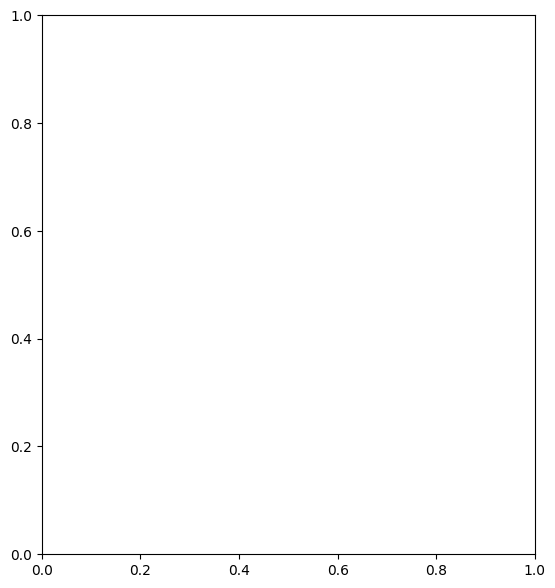

In [ ]:
#@title Plotting Context Recall and Precision From Our Pipeline
def plot_ragas_metrics(recall_df, precision_df):
    plt.figure(figsize=(14, 7))

    # Plot context recall
    plt.subplot(1, 2, 1)
    sns.histplot(recall_df['context_recall'], bins=10, kde=True)
    plt.title('Context Recall@5 Distribution')
    plt.xlabel('Recall@5')

    # Plot context precision
    plt.subplot(1, 2, 2)
    sns.histplot(precision_df['context_precision'], bins=10, kde=True)
    plt.title('Context Precision@5 Distribution')
    plt.xlabel('Precision@5')

    plt.tight_layout()
    plt.show()

# Call the function to plot RAGAS metrics
plot_ragas_metrics(recall_df, precision_df)